# 독립표본 t test와 대응표본 t test

* 독립표본 t test  
    * 서로 독립인 두 집단 비교  
    * 예시 : 수도권과 지방의 집 값
        
* 대응표본 t test  
    * 동일 그룹에 어떤 처리 후 전후 비교  
    * 예시 : 대출규제 시작 전과 후의 집 값


# 순서

* if 표본의 크기가 10~30이면, 
    * 정규성 검정
        * 정규성이라면, **등분산 검정**
        * 정규성이 아니라면, **순위합 검정**  
        
        
* if 표본의 크기가 30 이상이면,
    * 등분산 검정
        * 등분산이라면, **등분산 가정 독립표본 t test**
        * 아니라면, **이분산 가정 독립표본 t test**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [19]:
house_a=np.random.normal(6,5,40)
house_b=np.random.normal(2,5,40)

In [20]:
#수도권
house_a

array([ 0.02643686, -0.30569795, -1.72049346,  6.00093494,  8.2748809 ,
        9.07445745,  1.88054572,  8.61287314,  7.96932826, -5.43268581,
        0.83338588, 12.45379493,  0.74909633, -2.79221873,  1.47842757,
        3.39086289,  4.0055875 ,  9.06662048,  9.55538078,  1.47743884,
       -3.13814146,  9.37726994, -0.05027451, 15.42533718, 16.63840487,
        6.98281881,  4.35503248, 17.06392903,  3.77024717,  8.6163465 ,
        5.27712768,  6.17268379, -0.24195054,  6.33854279,  9.25694816,
        4.66695226, 12.92218912,  2.99997643,  4.45369729,  3.6587742 ])

In [21]:
#지방
house_b

array([-3.3726809 , 12.98417085, -0.55272459,  4.84849227,  7.10185395,
        5.82290027,  5.94264618, -3.73977277,  4.7884038 ,  1.60332836,
        3.03184941, 11.1710395 , -8.21173483,  7.61024269,  7.65609412,
       -1.54268017, -0.96719555,  0.40398534, -1.28270512, -0.87448689,
        2.0991006 , -0.15002206, -2.99964702, -4.44886492,  2.29873241,
        5.06867921, -1.50157574, -5.90270021,  1.30017239,  2.30873757,
        8.09684132, -3.36622663,  0.69681097,  0.35474922,  1.51136566,
        4.51238845, 10.24247696,  2.90603743,  0.60389244,  0.58806711])

In [22]:
tmp1=pd.concat([pd.DataFrame(['A']*40),pd.DataFrame(house_a.tolist())],axis=1)
tmp2=pd.concat([pd.DataFrame(['B']*40),pd.DataFrame(house_b.tolist())],axis=1)

df=pd.concat([tmp1,tmp2],axis=0)

In [23]:
df.head(3)

,0,0
0,A,0.026437
1,A,-0.305698
2,A,-1.720493


In [24]:
df.tail(3)

,0,0
37,B,2.906037
38,B,0.603892
39,B,0.588067


In [25]:
df.columns=['grp','value']
df.head()

,grp,value
0,A,0.026437
1,A,-0.305698
2,A,-1.720493
3,A,6.000935
4,A,8.274881


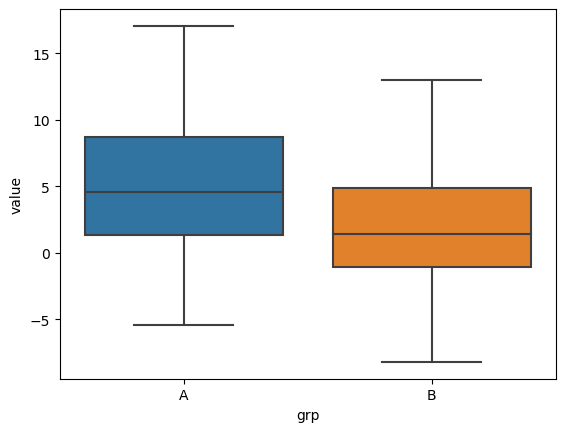

In [26]:
sns.boxplot(x='grp',y='value',data=df)
plt.show()

# 등분산성 검정

* 귀무가설   
    * 수도권(grp A), 지방(grp B) 집값의 분산이 같다.
* 대립가설  
    * 수도권(grp A), 지방(grp B) 집값의 분산이 다르다. 

In [27]:
stats.levene(np.array(df[df['grp']=='A']['value']), np.array(df[df['grp']=='B']['value']))

LeveneResult(statistic=0.7373595997112204, pvalue=0.3931391968083626)

In [28]:
stats.ttest_ind(np.array(df[df['grp']=='A']['value'])
                ,np.array(df[df['grp']=='B']['value'])
                , equal_var=True) # 등분산성이 같다.(일치)

Ttest_indResult(statistic=2.9389723012375346, pvalue=0.00432984539789562)